# CS 1656 – Introduction to Data Science (Fall 2021) 

## Instructor: Alexandros Labrinidis
## Teaching Assistants: Evangelos Karageorgos, Xiaoting Li, Gordon Lu

## Term Project 

**Released: October 26, 2021**

**Due: November 30, 2021**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from sklearn import cluster
import numpy as np

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

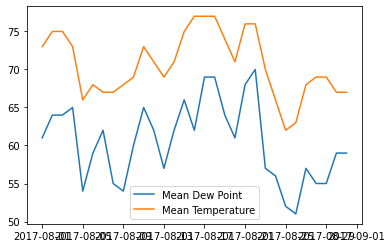

In [3]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [4]:
#df1=pd.read_csv('HealthyRideRentals2021-Q1.csv')
#df2=pd.read_csv('HealthyRideRentals2021-Q2.csv')
#df3=pd.read_csv('HealthyRideRentals2021-Q3.csv')
#df = pd.concat([df1,df2,df3])

df = pd.concat(map(pd.read_csv, ['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv','HealthyRideRentals2021-Q3.csv']))
df['Day']=pd.to_datetime(df['Starttime']).dt.date

#df.fillna(-1)
fromCNT=df.groupby(["From station id",'Day']).size().reset_index(name="fromCNT")

fromCNT=pd.DataFrame(fromCNT,columns=["Day","From station id","fromCNT"])
fromCNT=fromCNT.rename(columns={"From station id":"Sid"})

#print(type(fromCNT))








In [5]:
toCNT=df.groupby(["To station id",'Day']).size().reset_index(name="toCNT")
toCNT=pd.DataFrame(toCNT,columns=["Day","To station id","toCNT"])
toCNT=toCNT.rename(columns={"To station id":"Sid"})

result=fromCNT.merge(toCNT,how="outer")
result=result.fillna(0)
result=result.sort_values(by=["Day","Sid"],ascending=True)
result


,Day,Sid,fromCNT,toCNT
328,2021-01-01,1002.0,1.0,1.0
1276,2021-01-01,1010.0,1.0,0.0
14859,2021-01-01,1017.0,0.0,2.0
3415,2021-01-01,1024.0,1.0,1.0
4007,2021-01-01,1028.0,1.0,1.0
...,...,...,...,...
14262,2021-09-30,49881.0,1.0,0.0
14369,2021-09-30,49921.0,1.0,1.0
14419,2021-09-30,49941.0,3.0,4.0
14579,2021-09-30,49951.0,4.0,2.0


In [6]:



df2 = pd.concat(map(pd.read_csv, ['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv','HealthyRideRentals2021-Q3.csv']))
table=df2[["Bikeid","From station id","To station id","Starttime"]].sort_values(by=["Bikeid","Starttime"])
table.head()
table=table[table["From station id"].isnull()==False]
table=table[table["To station id"].isnull()==False]
table["Bikeid"]
table['Day']=pd.to_datetime(table['Starttime']).dt.date




# caluate the rebal count
data = []
prev_Bike = -1
prev_sid = -1
for index, row in table.iterrows():
    current_Bike = row['Bikeid']
    if(prev_Bike == -1):
        prev_Bike = current_Bike
        prev_sid = row['To station id']
    else:
        current_sid = row['From station id']
        if( (current_Bike==prev_Bike) &  (current_sid != prev_sid) ):
            data.append([row.Day,current_sid])
        prev_Bike = current_Bike
        prev_sid = row['To station id']

rebalance = pd.DataFrame(data, columns=['Day','Sid'])    
rebalcount = rebalance.groupby(by = ['Day','Sid']).size().reset_index(name = 'rebalCNT')

result2=result.merge(rebalcount, how="outer")
result2=result2.fillna(0)
result2.head(20)






    
    









,Day,Sid,fromCNT,toCNT,rebalCNT
0,2021-01-01,1002.0,1.0,1.0,0.0
1,2021-01-01,1010.0,1.0,0.0,0.0
2,2021-01-01,1017.0,0.0,2.0,0.0
3,2021-01-01,1024.0,1.0,1.0,0.0
4,2021-01-01,1028.0,1.0,1.0,0.0
5,2021-01-01,1032.0,1.0,0.0,0.0
6,2021-01-01,1039.0,0.0,1.0,0.0
7,2021-01-01,1059.0,1.0,1.0,0.0
8,2021-01-01,1062.0,2.0,2.0,0.0
9,2021-01-01,1094.0,2.0,0.0,0.0


### Task 1.2

In [7]:
df = pd.concat(map(pd.read_csv, ['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv','HealthyRideRentals2021-Q3.csv']))
df['Month']=pd.to_datetime(df['Starttime']).dt.month



#df.fillna(-1)
fromCNT=df.groupby(["From station id",'Month']).size().reset_index(name="fromCNT")

fromCNT=pd.DataFrame(fromCNT,columns=["Month","From station id","fromCNT"])
fromCNT=fromCNT.rename(columns={"From station id":"Sid"})

toCNT=df.groupby(["To station id",'Month']).size().reset_index(name="toCNT")
toCNT=pd.DataFrame(toCNT,columns=["Month","To station id","toCNT"])
toCNT=toCNT.rename(columns={"To station id":"Sid"})

result=fromCNT.merge(toCNT,how="outer")
result=result.fillna(0)
result=result.sort_values(by=["Month","Sid"],ascending=True)
result




# result=result.merge(rebalcount, how="outer")
# result=result.fillna(0)
# result

# result.head(20)




,Month,Sid,fromCNT,toCNT
0,1,1000.0,23.0,29.0
7,1,1001.0,18.0,27.0
14,1,1002.0,27.0,27.0
21,1,1003.0,2.0,1.0
28,1,1004.0,20.0,16.0
...,...,...,...,...
705,9,49881.0,45.0,25.0
712,9,49921.0,74.0,75.0
715,9,49941.0,64.0,69.0
722,9,49951.0,92.0,88.0


In [8]:
df = pd.concat(map(pd.read_csv, ['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv','HealthyRideRentals2021-Q3.csv']))

df['Month']=pd.to_datetime(df['Starttime']).dt.month
df=df.sort_values(by=["Bikeid","Month"])
df=df[df["From station id"].isnull()==False]
df=df[df["To station id"].isnull()==False]




data = []
prev_Bike = -1
prev_sid = -1
for index, row in df.iterrows():
    current_Bike = row['Bikeid']
    if(prev_Bike == -1):
        prev_Bike = current_Bike
        prev_sid = row['To station id']
    else:
        current_sid = row['From station id']
        if( (current_Bike==prev_Bike) &  (current_sid != prev_sid) ):
            data.append([row.Month, current_sid])
        prev_Bike = current_Bike
        prev_sid = row['To station id']

rebalance = pd.DataFrame(data, columns=['Month','Sid'])    
rebalcount = rebalance.groupby(by = ['Month','Sid']).size().reset_index(name = 'rebalCNT')


rebalcount=rebalcount.sort_values(by=["Month","Sid"],ascending=True)
result=result.merge(rebalcount,how="outer")
result=result.fillna(0)

result.head(20)

,Month,Sid,fromCNT,toCNT,rebalCNT
0,1,1000.0,23.0,29.0,1.0
1,1,1001.0,18.0,27.0,1.0
2,1,1002.0,27.0,27.0,3.0
3,1,1003.0,2.0,1.0,0.0
4,1,1004.0,20.0,16.0,2.0
5,1,1005.0,6.0,3.0,0.0
6,1,1006.0,8.0,8.0,1.0
7,1,1007.0,9.0,7.0,1.0
8,1,1009.0,8.0,3.0,0.0
9,1,1010.0,47.0,30.0,12.0


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [9]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046



### Task 2.1

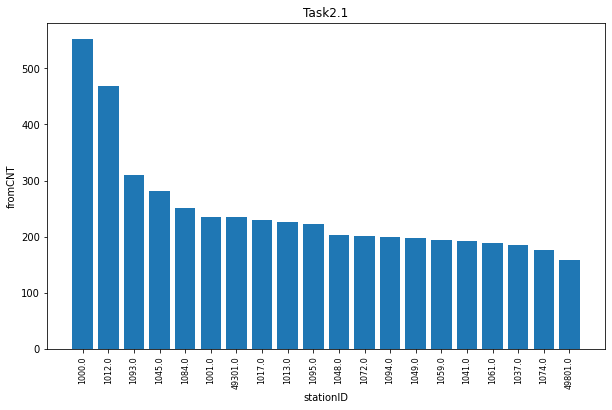

,Month,Sid,fromCNT,toCNT,rebalCNT
303,4,1000.0,553.0,591.0,13.0
315,4,1012.0,469.0,479.0,12.0
375,4,1093.0,310.0,346.0,8.0
347,4,1045.0,282.0,299.0,10.0
370,4,1084.0,252.0,263.0,16.0
304,4,1001.0,236.0,255.0,11.0
385,4,49301.0,236.0,236.0,19.0
320,4,1017.0,230.0,276.0,6.0
316,4,1013.0,227.0,251.0,6.0
377,4,1095.0,222.0,229.0,9.0


In [10]:
r2 = result.loc[result['Month'] == filter_month]
r2=r2.sort_values(by=["fromCNT"],ascending=False)
r2=r2.head(20)

fig = plt.figure(figsize=(10, 6))




plt.bar(range(len(r2['Sid'])),r2['fromCNT'], align = 'center')
plt.xticks(range(len(r2['Sid'])), r2['Sid'],rotation = 90, fontsize = 8)

plt.xlabel('stationID')
plt.ylabel('fromCNT')
plt.title('Task2.1')

plt.savefig("Task2.1.png")
plt.show()
r2


### Task 2.2

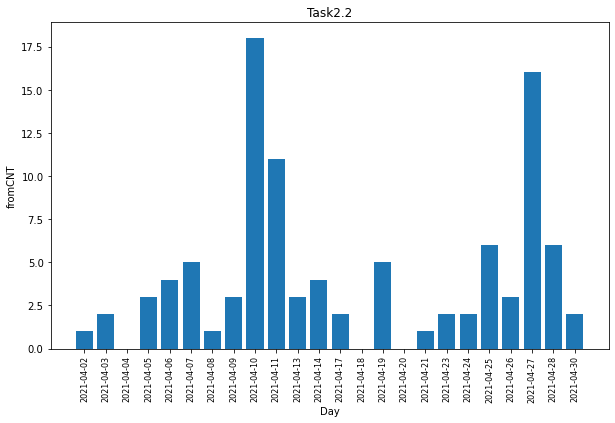

In [11]:
r3=result2
r3["Month"]=pd.to_datetime(r3['Day']).dt.month
r3=r3.loc[r3['Month'] == filter_month]
r3=r3.loc[r3["Sid"]==filter_stationID]


fig = plt.figure(figsize=(10, 6))



plt.bar(range(len(r3['Day'])),r3['fromCNT'], align = 'center')
plt.xticks(range(len(r3['Day'])), r3['Day'],rotation = 90, fontsize = 8)

plt.xlabel('Day')
plt.ylabel('fromCNT')
plt.title('Task2.2')

plt.savefig("Task2.2.png")
plt.show()



### Task 2.3

In [12]:


df = pd.concat(map(pd.read_csv, ['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv','HealthyRideRentals2021-Q3.csv']))

df['Month']=pd.to_datetime(df['Starttime']).dt.month

df=df.loc[df['Month'] == filter_month]
df["Hour"]=pd.to_datetime(df["Starttime"]).dt.hour



fromCNT1=df.groupby(['Hour']).size().reset_index(name="fromCNT")

#fromCNT1=pd.DataFrame(fromCNT1,columns=["Month","From station id","fromCNT"])
#fromCNT1=fromCNT1.rename(columns={"From station id":"Sid"})

# r4=fromCNT1.merge(df,how="outer")
# r4=r4.fillna(0)
# r4=r4.loc[r4['Month'] == filter_month]
fromCNT1








,Hour,fromCNT
0,0,154
1,1,94
2,2,60
3,3,39
4,4,29
5,5,56
6,6,65
7,7,157
8,8,192
9,9,297


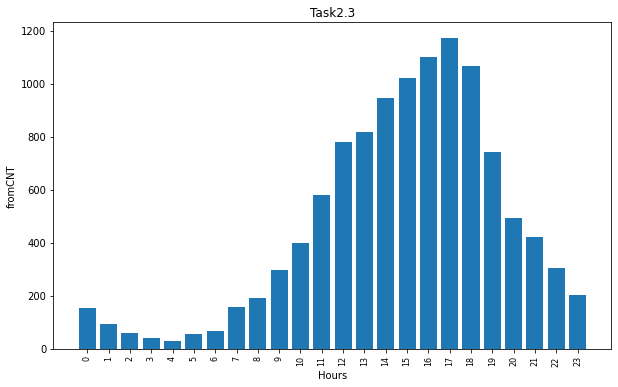

In [13]:

fig = plt.figure(figsize=(10, 6))



plt.bar(range(len(fromCNT1['Hour'])),fromCNT1['fromCNT'], align = 'center')
plt.xticks(range(len(fromCNT1['Hour'])), fromCNT1['Hour'],rotation = 90, fontsize = 8)

plt.xlabel('Hours')
plt.ylabel('fromCNT')
plt.title('Task2.3')

plt.savefig("Task2.3.png")
plt.show()


### Task 2.4

In [14]:
df = pd.concat(map(pd.read_csv, ['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv','HealthyRideRentals2021-Q3.csv']))

df['Day']=pd.to_datetime(df['Starttime']).dt.date
df['Month']=pd.to_datetime(df['Starttime']).dt.month

df=df.loc[df['Month'] == filter_month]




Count=df.groupby(['Day',"Bikeid"]).size().reset_index(name="Count")

Count=Count.sort_values(by=["Count"],ascending=False)
Count=Count.head(20)

#fromCNT1=pd.DataFrame(fromCNT1,columns=["Month","From station id","fromCNT"])
#fromCNT1=fromCNT1.rename(columns={"From station id":"Sid"})

# r4=fromCNT1.merge(df,how="outer")
# r4=r4.fillna(0)
# r4=r4.loc[r4['Month'] == filter_month]



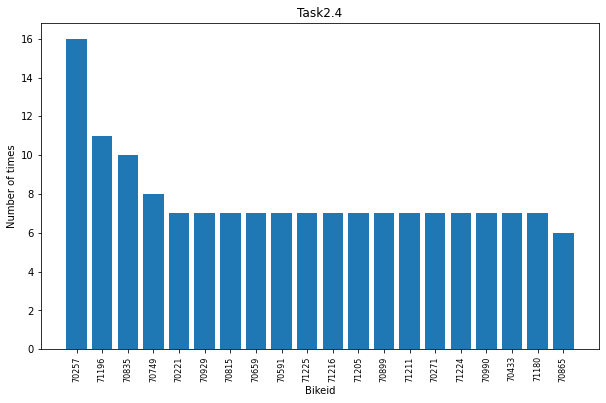

In [15]:
fig = plt.figure(figsize=(10, 6))

plt.bar(range(len(Count['Bikeid'])),Count['Count'], align = 'center')
plt.xticks(range(len(Count['Bikeid'])), Count['Bikeid'],rotation = 90, fontsize = 8)

plt.xlabel('Bikeid')
plt.ylabel('Number of times')
plt.title('Task2.4')

plt.savefig("Task2.4.png")
plt.show()


---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

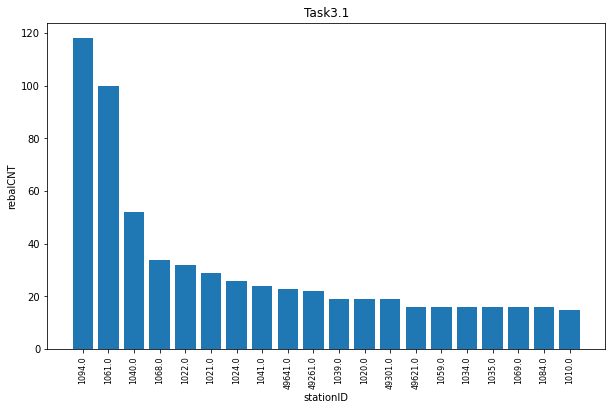

In [16]:
r6=result.loc[result['Month'] == filter_month]
r6=r6.sort_values(by=["rebalCNT"],ascending=False)
r6=r6.head(20)

fig = plt.figure(figsize=(10, 6))




plt.bar(range(len(r6['Sid'])),r6['rebalCNT'], align = 'center')
plt.xticks(range(len(r6['Sid'])), r6['Sid'],rotation = 90, fontsize = 8)

plt.xlabel('stationID')
plt.ylabel('rebalCNT')
plt.title('Task3.1')

plt.savefig("Task3.1.png")
plt.show()




### Task 3.2

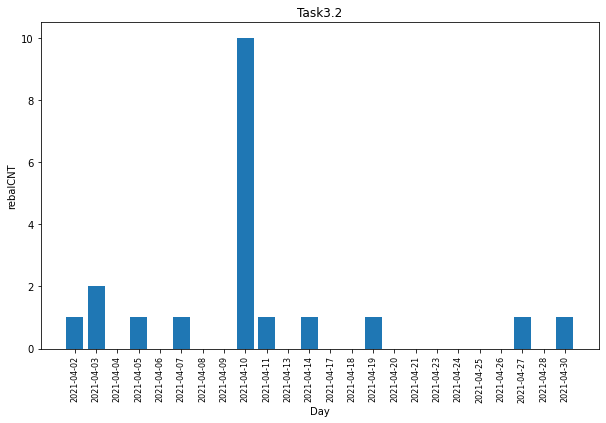

In [17]:
r7=result2
r7["Month"]=pd.to_datetime(r7['Day']).dt.month
r7=r7.loc[r7['Month'] == filter_month]
r7=r7.loc[r7["Sid"]==filter_stationID]


fig = plt.figure(figsize=(10, 6))



plt.bar(range(len(r7['Day'])),r7['rebalCNT'], align = 'center')
plt.xticks(range(len(r7['Day'])), r7['Day'],rotation = 90, fontsize = 8)

plt.xlabel('Day')
plt.ylabel('rebalCNT')
plt.title('Task3.2')

plt.savefig("Task3.2.png")
plt.show()


---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

In [18]:
April=result.loc[result['Month'] == 4 ] 
April=pd.DataFrame(April,columns=["Sid","fromCNT"])
April=April.rename(columns={"fromCNT":"AprilCNT"})
April=April.fillna(0)

May=result.loc[result['Month'] == 5] 
May=pd.DataFrame(May,columns=["Sid","fromCNT"])
May=May.rename(columns={"fromCNT":"MayCNT"})
May=May.fillna(0)

June=result.loc[result['Month'] == 6]
June=pd.DataFrame(June,columns=["Sid","fromCNT"])
June=June.rename(columns={"fromCNT":"JuneCNT"})
June=June.fillna(0)




Three_From=April.merge(May,how="outer").merge(June,how="outer")
Three_From=Three_From.fillna(0)
Three_From

#Create totlal fromCNT for 4,5,6












,Sid,AprilCNT,MayCNT,JuneCNT
0,1000.0,553.0,834.0,811.0
1,1001.0,236.0,342.0,366.0
2,1002.0,145.0,97.0,144.0
3,1003.0,42.0,86.0,83.0
4,1004.0,111.0,118.0,89.0
...,...,...,...,...
104,49921.0,86.0,122.0,96.0
105,49951.0,84.0,135.0,132.0
106,88887.0,1.0,0.0,0.0
107,49941.0,0.0,21.0,73.0


In [19]:
April=result.loc[result['Month'] == 4 ] 
April=pd.DataFrame(April,columns=["Sid","rebalCNT"])
April=April.rename(columns={"rebalCNT":"AprilCNT"})
April=April.fillna(0)

May=result.loc[result['Month'] == 5] 
May=pd.DataFrame(May,columns=["Sid","rebalCNT"])
May=May.rename(columns={"rebalCNT":"MayCNT"})
May=May.fillna(0)

June=result.loc[result['Month'] == 6]
June=pd.DataFrame(June,columns=["Sid","rebalCNT"])
June=June.rename(columns={"rebalCNT":"JuneCNT"})
June=June.fillna(0)




Three_Rebal=April.merge(May,how="outer").merge(June,how="outer")
Three_Rebal=Three_Rebal.fillna(0)
Three_Rebal=Three_Rebal.rename(columns={"AprilCNT":"AprilR","MayCNT":"MayR","JuneCNT":"JuneR"})
T4var=Three_Rebal.merge(Three_From,how="outer")
T4var.fillna(0)
T4var

,Sid,AprilR,MayR,JuneR,AprilCNT,MayCNT,JuneCNT
0,1000.0,13.0,13.0,36.0,553.0,834.0,811.0
1,1001.0,11.0,16.0,16.0,236.0,342.0,366.0
2,1002.0,7.0,11.0,12.0,145.0,97.0,144.0
3,1003.0,4.0,5.0,4.0,42.0,86.0,83.0
4,1004.0,4.0,5.0,9.0,111.0,118.0,89.0
...,...,...,...,...,...,...,...
104,49921.0,9.0,7.0,2.0,86.0,122.0,96.0
105,49951.0,8.0,6.0,6.0,84.0,135.0,132.0
106,88887.0,1.0,0.0,0.0,1.0,0.0,0.0
107,49941.0,0.0,7.0,13.0,0.0,21.0,73.0


In [20]:
K1 = cluster.KMeans(n_clusters=3, init = 'k-means++',\
                         random_state=5000)
K1.fit(T4var[["AprilR","MayR","JuneR","AprilCNT","MayCNT","JuneCNT"]])





count1=[0,0,0]




for i in K1.labels_:
    count1[i]+=1


value1=pd.DataFrame(np.array(count1),columns=["Cluster ID"])
value1=value1.sort_values(by="Cluster ID",ascending=False)
value1



,Cluster ID
1,82
0,25
2,2


In [21]:
K2 = cluster.KMeans(n_clusters=4, init = 'k-means++',\
                         random_state=5000)
K2.fit(T4var[["AprilR","MayR","JuneR","AprilCNT","MayCNT","JuneCNT"]])


count2=[0,0,0,0]



for i in K2.labels_:
    count2[i]+=1

value2=pd.DataFrame(np.array(count2),columns=["Cluster ID"])
value2=value2.sort_values(by="Cluster ID",ascending=False)
value2




,Cluster ID
3,45
0,41
1,21
2,2


In [22]:
K3 = cluster.KMeans(n_clusters=5, init = 'k-means++',\
                         random_state=5000)
K3.fit(T4var[["AprilR","MayR","JuneR","AprilCNT","MayCNT","JuneCNT"]])




count3=[0,0,0,0,0]

for i in K3.labels_:
    count3[i]+=1


value3=pd.DataFrame(np.array(count3),columns=["Cluster ID"])
value3=value3.sort_values(by="Cluster ID",ascending=False)
value3


,Cluster ID
0,41
2,41
4,20
1,5
3,2


In [23]:
K4=cluster.DBSCAN(min_samples=2,eps=3)

K4.fit(T4var[["AprilR","MayR","JuneR","AprilCNT","MayCNT","JuneCNT"]])


index=np.unique(K4.labels_)
print(index)




count4=[0]*len(index)



for i in K4.labels_:
    count4[i]+=1


value4=pd.DataFrame(np.array(count4),columns=["Cluster ID"])
value4=value4.sort_values(by="Cluster ID",ascending=False)
value4


[-1  0]


,Cluster ID
1,106
0,3


In [24]:
K5=cluster.DBSCAN(min_samples=3,eps=10)

K5.fit(T4var[["AprilR","MayR","JuneR","AprilCNT","MayCNT","JuneCNT"]])


index2=np.unique(K5.labels_)
print(index2)






count5=[0]*len(index2)



for i in K5.labels_:
    count5[i]+=1

count5
value5=pd.DataFrame(np.array(count5),columns=["Cluster ID"])
value5=value5.sort_values(by="Cluster ID",ascending=False)
value5

[-1  0  1]


,Cluster ID
2,101
0,4
1,4


In [25]:
K6=cluster.DBSCAN(min_samples=4,eps=14)

K6.fit(T4var[["AprilR","MayR","JuneR","AprilCNT","MayCNT","JuneCNT"]])


index3=np.unique(K6.labels_)
print(index3)






count6=[0]*len(index3)



for i in K6.labels_:
    count6[i]+=1

count6
value6=pd.DataFrame(np.array(count6),columns=["Cluster ID"])
value6=value6.sort_values(by="Cluster ID",ascending=False)
value6

[-1  0  1]


,Cluster ID
2,98
1,7
0,4


### Task 4.2

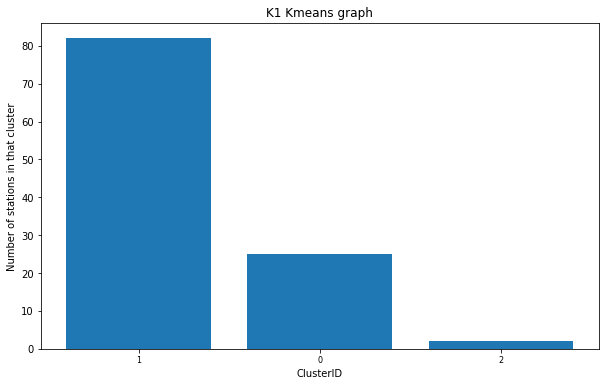

In [26]:
fig = plt.figure(figsize=(10, 6))

plt.bar(range(len(value1["Cluster ID"])),value1["Cluster ID"],align = 'center')

# Formatting graph
plt.xticks(range(len(value1.index.to_list())), value1.index.to_list(),
                fontsize = 8)
plt.xlabel('ClusterID')
plt.ylabel('Number of stations in that cluster')
plt.title('K1 Kmeans graph')


plt.show()



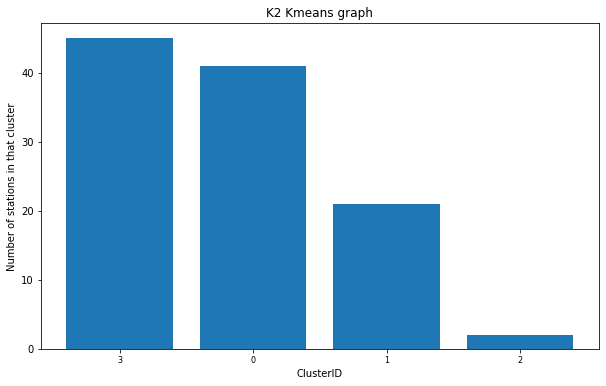

In [27]:
fig = plt.figure(figsize=(10, 6))

plt.bar(range(len(value2["Cluster ID"])),value2["Cluster ID"],align = 'center')

# Formatting graph
plt.xticks(range(len(value2.index.to_list())), value2.index.to_list(),
                fontsize = 8)
plt.xlabel('ClusterID')
plt.ylabel('Number of stations in that cluster')
plt.title('K2 Kmeans graph')


plt.show()

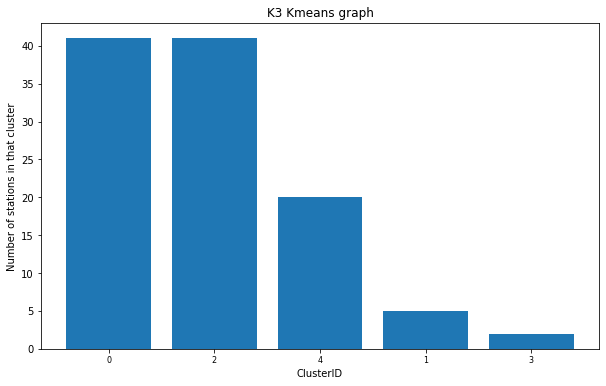

In [28]:
fig = plt.figure(figsize=(10, 6))

plt.bar(range(len(value3["Cluster ID"])),value3["Cluster ID"],align = 'center')

# Formatting graph
plt.xticks(range(len(value3.index.to_list())), value3.index.to_list(),
                fontsize = 8)
plt.xlabel('ClusterID')
plt.ylabel('Number of stations in that cluster')
plt.title('K3 Kmeans graph')


plt.show()

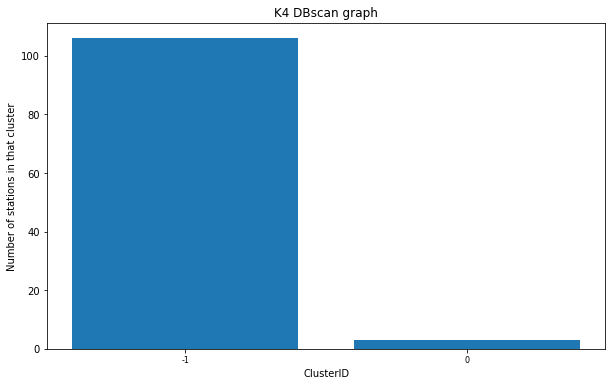

In [29]:
fig = plt.figure(figsize=(10, 6))

plt.bar(range(len(value4["Cluster ID"])),value4["Cluster ID"],align = 'center')
list4=value4.index.to_list()
list4[0]=-1

# Formatting graph
plt.xticks(range(len(value4.index.to_list())), list4,
                fontsize = 8)
plt.xlabel('ClusterID')
plt.ylabel('Number of stations in that cluster')
plt.title('K4 DBscan graph')


plt.show()

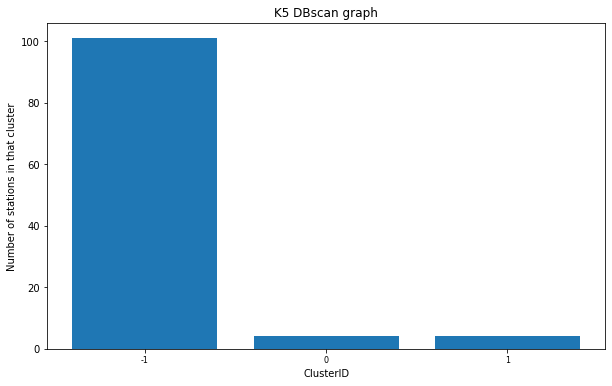

In [30]:
fig = plt.figure(figsize=(10, 6))

plt.bar(range(len(value5["Cluster ID"])),value5["Cluster ID"],align = 'center')

list5=value5.index.to_list()
list5[0]=-1

# Formatting graph
plt.xticks(range(len(value5.index.to_list())), list5,
                fontsize = 8)
plt.xlabel('ClusterID')
plt.ylabel('Number of stations in that cluster')
plt.title('K5 DBscan graph')


plt.show()

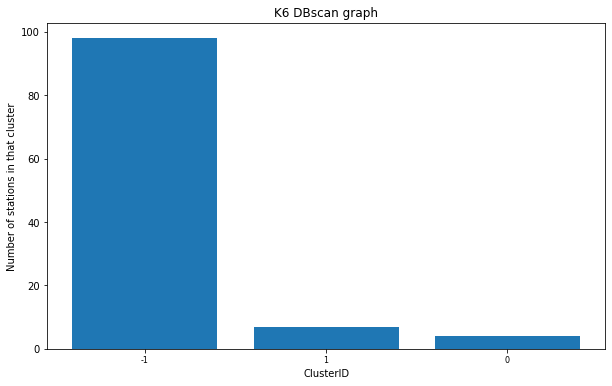

In [31]:
fig = plt.figure(figsize=(10, 6))

plt.bar(range(len(value6["Cluster ID"])),value6["Cluster ID"],align = 'center')
list=value6.index.to_list()
list[0]=-1


# Formatting graph
plt.xticks(range(len(value6.index.to_list())), list,
                fontsize = 8)
plt.xlabel('ClusterID')
plt.ylabel('Number of stations in that cluster')
plt.title('K6 DBscan graph')


plt.show()

### Task 4.3

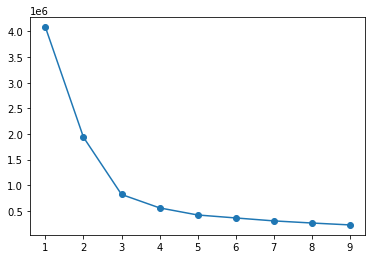

In [32]:
SSE=[]
for test in range(1,10):
    Test=cluster.KMeans(n_clusters=test, init = 'k-means++',\
                         random_state=5000)
    Test.fit(T4var[["AprilR","MayR","JuneR","AprilCNT","MayCNT","JuneCNT"]])
    SSE.append(Test.inertia_)

X=range(1,10)
plt.xlabel=("k")
plt.ylabel=("SSE")
plt.plot(X,SSE,"o-")
plt.show()


K means algorithm is best choice, since it includes all the data. Based on the graph and Elbow Method, 3 is the point that diminishing returns are no longer worth the additional cost, which means k=3 is the best